# Import

In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [107]:
pd.set_option('display.max_columns', None)

In [108]:
load_dotenv() 
DATASET_FOLDER = os.getenv('DATASET_FOLDER')

In [109]:
raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")

/tmp/ipykernel_20822/3624628935.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")


# Data Wrangling

In [110]:
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
cols
pre_df = raw_df.rename(columns=cols)

In [111]:
# pre_df = pre_df.dropna()

In [112]:
pre_df.city=pre_df.city.str.upper()

In [113]:
pre_df.drop(['program_identifier','inspection_business_name','inspection_serial_num','violation_record_id','business_id'], axis=1);

In [114]:
pre_df["inspection_date"]=pd.to_datetime(pre_df["inspection_date"])

pre_df['weekday'] = pre_df.inspection_date.dt.day_name()


In [115]:
df = pre_df.reindex()

In [116]:
# Fix wrong longitude 
df.loc[df['longitude'] > 122, 'longitude'] *=-1

In [117]:
uniques = {}
uniques_count={}
df.apply(
    (
        lambda x: (uniques.update(
            {x.name:x.unique()}
        ),
          uniques_count.update(
              {x.name:len(x.unique())} 
          ))
    ),
    axis=0)
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques

,Count
inspection_serial_num,180345
violation_record_id,141974
business_id,12509
program_identifier,11300
address,10004
name,9833
latitude,9522
longitude,9517
inspection_business_name,9287
phone,7360


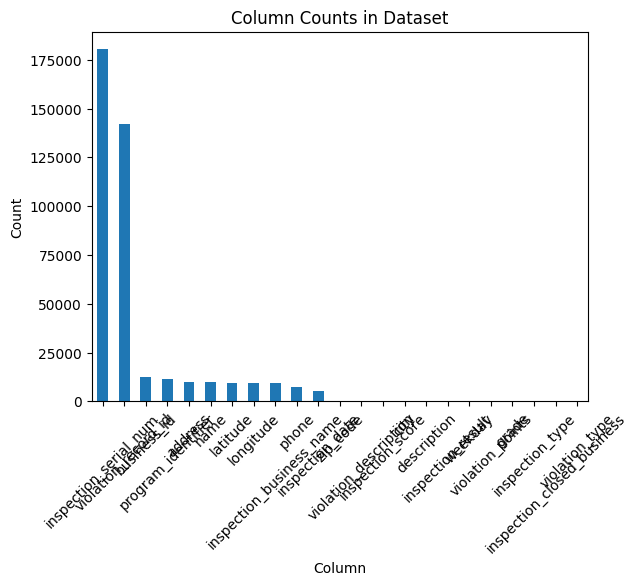

In [118]:
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques
# Create the bar plot
ax = df_uniques.plot(kind='bar', legend=False)

# Set the axis labels and title
ax.set_xlabel('Column')
ax.set_ylabel('Count')
ax.set_title('Column Counts in Dataset')

# # Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Display the plot
plt.show()


# Featurs

## Weekday 

<Axes: title={'center': 'Inspection times on weekdays'}, xlabel='weekday', ylabel='count'>

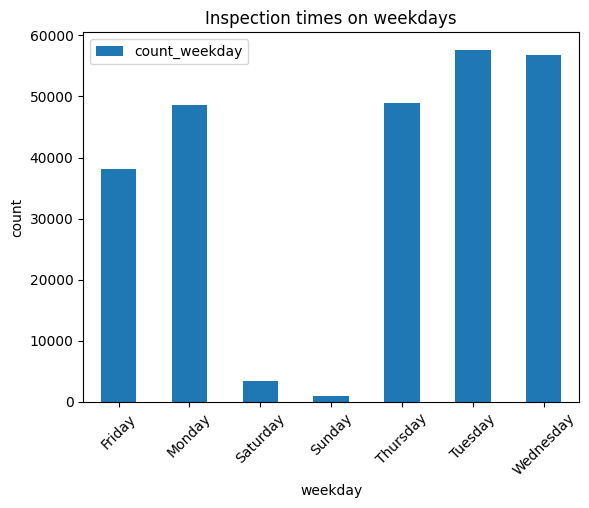

In [119]:
m = df.groupby('weekday').agg(count_weekday=('weekday','count'))
m.plot(kind='bar',
       # figsize=(5,2),
       xlabel='weekday',
       ylabel='count',
       rot=45, # rotate x label 
       # table=True, xlim=300, logy=True,
       title='Inspection times on weekdays',
      )

<Axes: title={'center': 'Inspection times on weekdays '}, ylabel='count_weekday'>

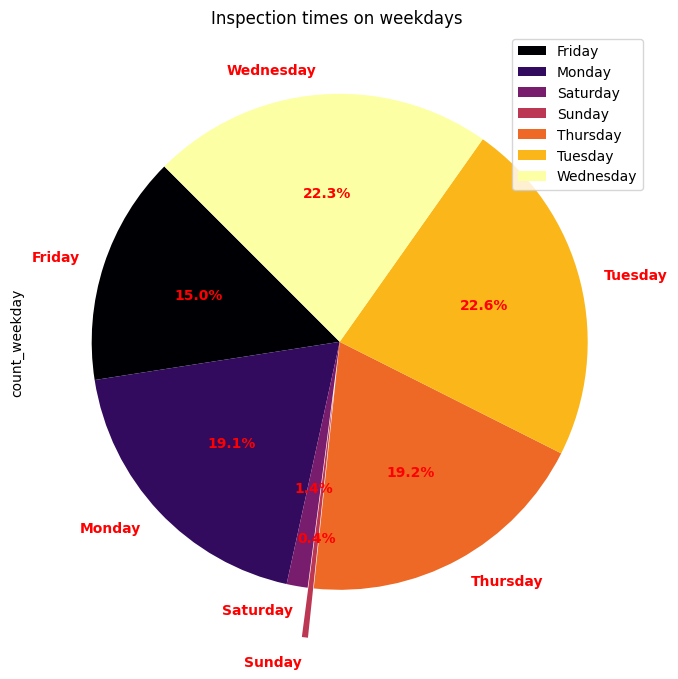

In [120]:
explode = (0.0, 0.0, 0.0, 0.2, 0.0, 0.0,0.0)
ax = m.plot(kind='pie', y='count_weekday',
       figsize=(8,15),
       colormap='inferno',
       explode = explode,
       # shadow=True,
       autopct='%1.1f%%',
       startangle=135,
       # hatch=['**', 'oO', 'O.O', '.||.', '/', '\\', '.'],
       title='Inspection times on weekdays ',

      )

from matplotlib.font_manager import FontProperties
font_props = FontProperties(weight='bold',)
for text in ax.texts:
    text.set_color('red')
    text.set_fontproperties(font_props)
ax

<Axes: title={'center': 'days'}, xlabel='inspection_date'>

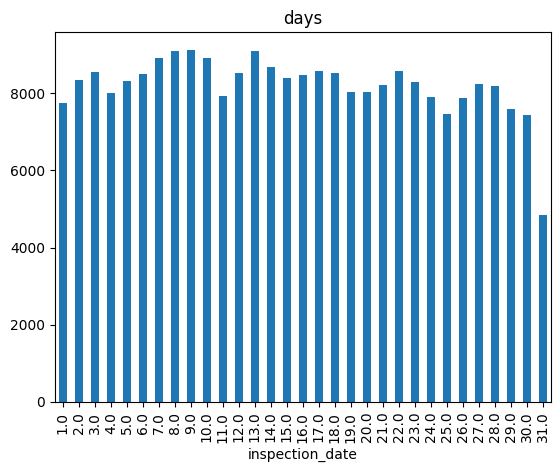

In [121]:
days_freq_gp = df.groupby([ df.inspection_date.dt.day]).agg('size')
days_freq_gp.plot(kind='bar', title="days")

<Axes: title={'center': 'months'}, xlabel='inspection_date'>

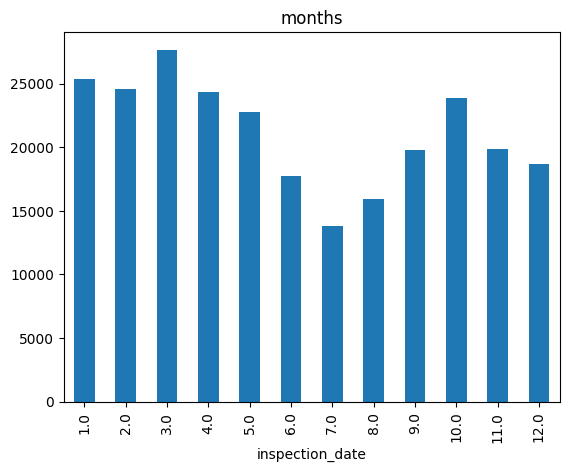

In [122]:
months_freq_gp = df.groupby([ df.inspection_date.dt.month]).agg('size')
months_freq_gp.plot(kind='bar', title="months")

<Axes: title={'center': 'years'}, xlabel='inspection_date'>

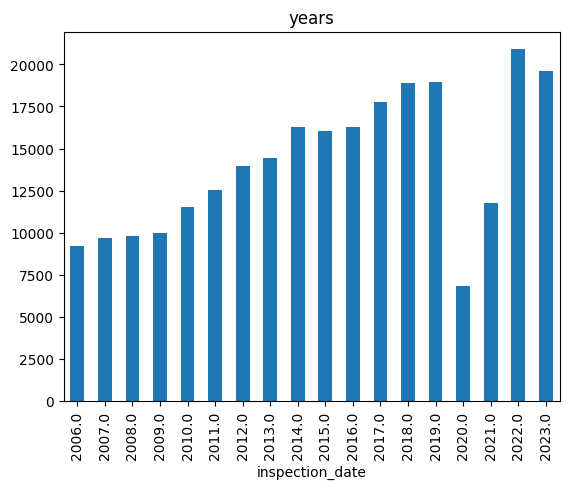

In [123]:
years_freq_gp = df.groupby([ df.inspection_date.dt.year]).agg('size')
years_freq_gp.plot(kind='bar', title="years")

In [124]:
# years_months_freq_gp = df.groupby([df.inspection_date.dt.year,df.inspection_date.dt.month]).agg('size')
# years_months_freq_gp.plot(kind='bar', title="years_months", figsize=(15,5), legend=False, rot=45)


## Most City-Store violations 

In [125]:
pd.pivot_table(df,index=['city','name','grade'],columns=['violation_type'],aggfunc='size')

violation_type                                       BLUE   RED
city        name                              grade            
ALGONA      COCO JOE'S                        1.0    56.0  37.0
            TACOS EL TAJIN                    1.0     NaN   1.0
AUBURN      7-ELEVEN # 38940                  3.0     NaN  10.0
            7-ELEVEN #27219C                  2.0     3.0   5.0
            7-ELEVEN #35333B                  2.0    11.0  16.0
...                                                   ...   ...
WOODINVILLE WOODIN CREEK KITCHEN & TAP        1.0     NaN   1.0
            WOODINVILLE BAGEL BAKERY          2.0     2.0   7.0
            WOODINVILLE CAFE                  1.0     6.0  17.0
            WOODINVILLE CUT SHOP              1.0     3.0   4.0
            Walla Walla Steak Co- Woodinville 2.0     NaN   1.0

[6744 rows x 2 columns]

In [126]:
df_plot = df[['name','city','grade',]]
df_plot

,name,city,grade
0,#807 TUTTA BELLA,SEATTLE,1.0
1,#807 TUTTA BELLA,SEATTLE,1.0
2,#807 TUTTA BELLA,SEATTLE,1.0
3,#807 TUTTA BELLA,SEATTLE,1.0
4,#807 TUTTA BELLA,SEATTLE,1.0
...,...,...,...
255137,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255138,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255139,ZZ DESSERT,KENT,1.0
255140,ZZ DESSERT,KENT,1.0


## Map

<Axes: >

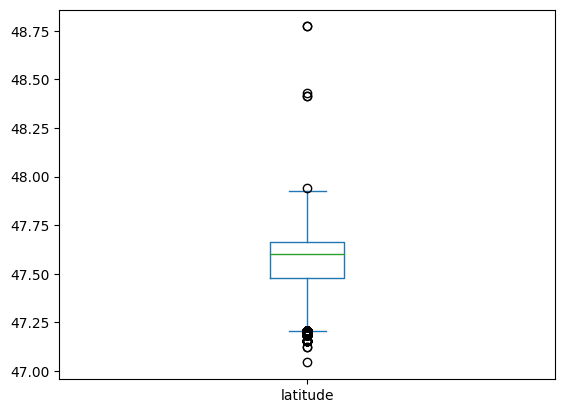

In [127]:
# Before remove outlier
df.latitude.plot(kind='box')

<Axes: >

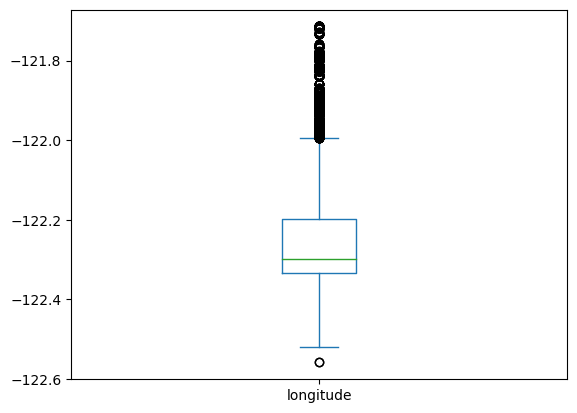

In [128]:
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = df[['latitude', 'longitude']].quantile(0.01)
q3 = df[['latitude', 'longitude']].quantile(0.90)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out rows that fall outside the acceptable range
df2 = df[((df[['latitude', 'longitude']] >= lower_bound) & (df[['latitude', 'longitude']] <= upper_bound)).all(axis=1)]

# After remove outlier
df2.longitude.plot(kind='box')

In [129]:
df3=df2.copy()

lat_bins = np.arange(df3.latitude.min(), df3.latitude.max(), 0.1)
lon_bins = np.arange(df3.longitude.min(), df3.longitude.max(), 0.1)

# Create bins for latitude and longitude
df3['latitude_bin'] = pd.cut(df3['latitude'], lat_bins)
df3['longitude_bin'] = pd.cut(df3['longitude'], lon_bins)

# Perform aggregation on the bins
agg_df = df3.groupby(['latitude_bin', 'longitude_bin']).agg('size').reset_index().rename(columns={0: '_size'})
agg_df

/tmp/ipykernel_20822/763498567.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df3.groupby(['latitude_bin', 'longitude_bin']).agg('size').reset_index().rename(columns={0: '_size'})


,latitude_bin,longitude_bin,_size
0,"(47.121, 47.221]","(-122.559, -122.459]",0
1,"(47.121, 47.221]","(-122.459, -122.359]",19
2,"(47.121, 47.221]","(-122.359, -122.259]",4
3,"(47.121, 47.221]","(-122.259, -122.159]",0
4,"(47.121, 47.221]","(-122.159, -122.059]",46
...,...,...,...
59,"(47.821, 47.921]","(-122.259, -122.159]",30
60,"(47.821, 47.921]","(-122.159, -122.059]",6
61,"(47.821, 47.921]","(-122.059, -121.959]",2
62,"(47.821, 47.921]","(-121.959, -121.859]",0


In [130]:
df4 = df3.copy()
df4 = df4.groupby(['latitude_bin', 'longitude_bin','inspection_result']).agg('size').reset_index().rename(columns={0: '_size'}).sort_values(
    ['latitude_bin', 'longitude_bin','_size'], ascending=False)
df4.describe()
df4[df4._size>0].describe()
df4[df4._size>0]


/tmp/ipykernel_20822/2539054006.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = df4.groupby(['latitude_bin', 'longitude_bin','inspection_result']).agg('size').reset_index().rename(columns={0: '_size'}).sort_values(


,latitude_bin,longitude_bin,inspection_result,_size
1114,"(47.821, 47.921]","(-122.059, -121.959]",Satisfactory,2
1096,"(47.821, 47.921]","(-122.159, -122.059]",Satisfactory,5
1084,"(47.821, 47.921]","(-122.159, -122.059]",Incomplete,1
1078,"(47.821, 47.921]","(-122.259, -122.159]",Satisfactory,17
1079,"(47.821, 47.921]","(-122.259, -122.159]",Unsatisfactory,8
...,...,...,...,...
73,"(47.121, 47.221]","(-122.159, -122.059]",Complete,6
89,"(47.121, 47.221]","(-122.159, -122.059]",Unsatisfactory,6
52,"(47.121, 47.221]","(-122.359, -122.259]",Satisfactory,2
53,"(47.121, 47.221]","(-122.359, -122.259]",Unsatisfactory,2


In [131]:
df3['violation_points']

0         15
1          5
2          5
3          5
4          0
          ..
255137     0
255138     0
255139     5
255140     5
255141     5
Name: violation_points, Length: 254357, dtype: int64

In [132]:
df3.inspection_score

0         20.0
1         20.0
2         10.0
3         10.0
4          0.0
          ... 
255137     0.0
255138     0.0
255139    10.0
255140    10.0
255141     5.0
Name: inspection_score, Length: 254357, dtype: float64

In [133]:
df.violation_type

0          RED
1          RED
2         BLUE
3          RED
4          NaN
          ... 
255137     NaN
255138     NaN
255139    BLUE
255140    BLUE
255141     RED
Name: violation_type, Length: 255142, dtype: object

## deleting useless col


In [135]:
df = df.drop('zip_code',axis=1)
#same name
df = df.drop(['program_identifier','inspection_business_name'],axis=1)
#low human readability
df = df.drop(['business_id','inspection_serial_num','violation_record_id'],axis=1)


In [153]:
relation = df[['name','inspection_date','description','inspection_type','inspection_score','inspection_result','inspection_closed_business','violation_type','violation_description','violation_points','grade']]

In [189]:
relation['violation_description'].unique()

array(['1300 - Food contact surfaces cleaned and sanitized; no cross contamination',
       '2120 - Proper cold holding temperatures ( 42 degrees F to 45 degrees F)',
       '3200 - Insects, rodents, animals not present; entrance controlled.',
       '0200 - Food Worker Cards current for all food workers; new food workers trained',
       nan, '4400 - Plumbing properly sized, installed,...',
       '1710 - Proper hot holding temperatures (less than130 degrees)',
       '3400 - Wiping cloths properly used, stored, proper sanitizer',
       '4800 - Physical facilities properly installed,...',
       '1600 - Proper cooling procedure',
       '2110 - Proper cold holding temperatures (greater than  45 degrees F)',
       '3300 - Potential food contamination prevented during delivery,  preparation, storage, display',
       '2300 - Proper Consumer Advisory posted for raw ...',
       '0600 - Adequate handwashing facilities',
       '4200 - Food-contact surfaces maintained, clean, sanitized',

In [234]:
relation['description'].unique()

array(['Seating 0-12 - Risk Category III',
       'Seating 13-50 - Risk Category III',
       'Seating 51-150 - Risk Category III',
       'Bakery-no seating - Risk Category II',
       'Mobile Food Unit - Risk Category III',
       'Seating > 250 - Risk Category III',
       'Seating 151-250 - Risk Category III',
       'Grocery Store-no seating - Risk Category I',
       'Seating 13-50 - Risk Category II', 'Caterer - Risk Category II',
       'Caterer - Risk Category III', 'Seating 13-50 - Risk Category I',
       'Seating 0-12 - Risk Category I',
       'Meat/Sea Food - Risk Category III',
       'Bakery-no seating - Risk Category III',
       'Seating 0-12 - Risk Category II', 'Caterer - Risk Category I',
       'Limited Food Services - no permanent plumbing',
       'Seating 51-150 - Risk Category I',
       'Seating 51-150 - Risk Category II',
       'School Lunch Program - Risk II',
       'Mobile Food Unit - Risk Category I',
       'Mobile Food Unit - Risk Category II',
      

In [157]:
relation[['inspection_result','violation_description']].head(50)

,inspection_result,violation_description
0,Unsatisfactory,1300 - Food contact surfaces cleaned and sanit...
1,Unsatisfactory,2120 - Proper cold holding temperatures ( 42 d...
2,Unsatisfactory,"3200 - Insects, rodents, animals not present; ..."
3,Unsatisfactory,0200 - Food Worker Cards current for all food ...
4,Satisfactory,NaN
5,Satisfactory,NaN
6,Satisfactory,NaN
7,Unsatisfactory,"4400 - Plumbing properly sized, installed,..."
8,Unsatisfactory,1710 - Proper hot holding temperatures (less t...
9,Satisfactory,NaN


In [161]:
relation['inspection_result'].unique()

array(['Unsatisfactory', 'Satisfactory', 'Complete', 'Incomplete', nan,
       'Not Confirmed', 'Not Accessible', 'Not Ready For Inspection',
       'Baseline Data', 'Needs Assessment', 'Not Applicable',
       'Not In Compliance', 'No Longer At Location', 'Confirmed',
       'Increased Knowledge', 'Out of Business', 'In Compliance',
       'Not Tested', 'Not Permitted'], dtype=object)

In [235]:
relation[['name','inspection_date','violation_points','inspection_score','grade','description']]

,name,inspection_date,violation_points,inspection_score,grade,description
0,#807 TUTTA BELLA,2023-03-02,15,20.0,1.0,Seating 0-12 - Risk Category III
1,#807 TUTTA BELLA,2023-03-02,5,20.0,1.0,Seating 0-12 - Risk Category III
2,#807 TUTTA BELLA,2022-08-31,5,10.0,1.0,Seating 0-12 - Risk Category III
3,#807 TUTTA BELLA,2022-08-31,5,10.0,1.0,Seating 0-12 - Risk Category III
4,#807 TUTTA BELLA,2022-01-13,0,0.0,1.0,Seating 0-12 - Risk Category III
...,...,...,...,...,...,...
255137,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2017-11-27,0,0.0,2.0,Seating 0-12 - Risk Category III
255138,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2017-09-06,0,0.0,2.0,Seating 0-12 - Risk Category III
255139,ZZ DESSERT,2023-01-23,5,10.0,1.0,Seating 0-12 - Risk Category III
255140,ZZ DESSERT,2023-01-23,5,10.0,1.0,Seating 0-12 - Risk Category III
